# Loading Data

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df = pd.read_excel("Telco Churn dataset.xlsx")
df.head()

,customerID,gender,SeniorCitizen,MaritalStatus,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalEveMinutes,TotalEveCalls,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,TotalIntlCalls,CustomerServiceCalls,TotalCall,TotalRevenue,Churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,241.4,107,204.8,106,15.5,4,0,354,593.3,No
1,0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,No,...,131.7,94,169.5,106,10.3,9,5,326,280.85,Yes
2,0013-MHZWF,Female,0,No,Yes,9,Yes,No,DSL,No,...,178.6,102,126.8,82,8.0,4,2,324,571.45,No
3,0013-SMEOE,Female,1,Yes,No,71,Yes,No,Fiber optic,Yes,...,262.2,64,130.0,92,8.8,4,0,228,7904.25,No
4,0015-UOCOJ,Female,1,No,No,7,Yes,No,DSL,Yes,...,195.7,86,236.5,137,12.0,2,1,294,340.35,No


# Data Analysis

In [2]:
df.shape

(3333, 33)

In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'MaritalStatus', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'InternationalPlan', 'VoiceMailPlan',
       'NumbervMailMessages', 'TotalDayMinutes', 'TotalDayCalls',
       'TotalEveMinutes', 'TotalEveCalls', 'TotalNightMinutes',
       'TotalNightCalls', 'TotalIntlMinutes', 'TotalIntlCalls',
       'CustomerServiceCalls', 'TotalCall', 'TotalRevenue', 'Churn'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customerID            3333 non-null   object 
 1   gender                3333 non-null   object 
 2   SeniorCitizen         3333 non-null   int64  
 3   MaritalStatus         3333 non-null   object 
 4   Dependents            3333 non-null   object 
 5   tenure                3333 non-null   int64  
 6   PhoneService          3333 non-null   object 
 7   MultipleLines         3333 non-null   object 
 8   InternetService       3333 non-null   object 
 9   OnlineSecurity        3333 non-null   object 
 10  OnlineBackup          3333 non-null   object 
 11  DeviceProtection      3333 non-null   object 
 12  TechSupport           3333 non-null   object 
 13  StreamingTV           3333 non-null   object 
 14  StreamingMovies       3333 non-null   object 
 15  Contract             

In [5]:
df.describe()

,SeniorCitizen,tenure,NumbervMailMessages,TotalDayMinutes,TotalDayCalls,TotalEveMinutes,TotalEveCalls,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,TotalIntlCalls,CustomerServiceCalls,TotalCall
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.00000
mean,0.110111,28.001500,8.099010,179.775098,100.435644,200.980348,100.114311,200.872037,100.107711,10.237294,4.479448,1.562856,306.69997
std,0.313075,23.262239,13.688365,54.467389,20.069084,50.713844,19.922625,50.573847,19.568609,2.791840,2.461214,1.315491,34.44939
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,0.000000,0.000000,0.000000,194.00000
25%,0.000000,7.000000,0.000000,143.700000,87.000000,166.600000,87.000000,167.000000,87.000000,8.500000,3.000000,1.000000,284.00000
50%,0.000000,23.000000,0.000000,179.400000,101.000000,201.400000,100.000000,201.200000,100.000000,10.300000,4.000000,1.000000,307.00000
75%,0.000000,48.000000,20.000000,216.400000,114.000000,235.300000,114.000000,235.300000,113.000000,12.100000,6.000000,2.000000,330.00000
max,1.000000,72.000000,51.000000,350.800000,165.000000,363.700000,170.000000,395.000000,175.000000,20.000000,20.000000,9.000000,418.00000


In [6]:
df.isnull().sum()

customerID              0
gender                  0
SeniorCitizen           0
MaritalStatus           0
Dependents              0
tenure                  0
PhoneService            0
MultipleLines           0
InternetService         0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
Contract                0
PaperlessBilling        0
PaymentMethod           0
InternationalPlan       0
VoiceMailPlan           0
NumbervMailMessages     0
TotalDayMinutes         0
TotalDayCalls           0
TotalEveMinutes         0
TotalEveCalls           0
TotalNightMinutes       0
TotalNightCalls         0
TotalIntlMinutes        0
TotalIntlCalls          0
CustomerServiceCalls    0
TotalCall               0
TotalRevenue            0
Churn                   0
dtype: int64

In [7]:
df['Churn'].value_counts()

Churn
No     2850
Yes     483
Name: count, dtype: int64

In [8]:
rows_to_remove = df[df["Churn"] == "No"].sample(n=2350, random_state=42)
df = df.drop(rows_to_remove.index)

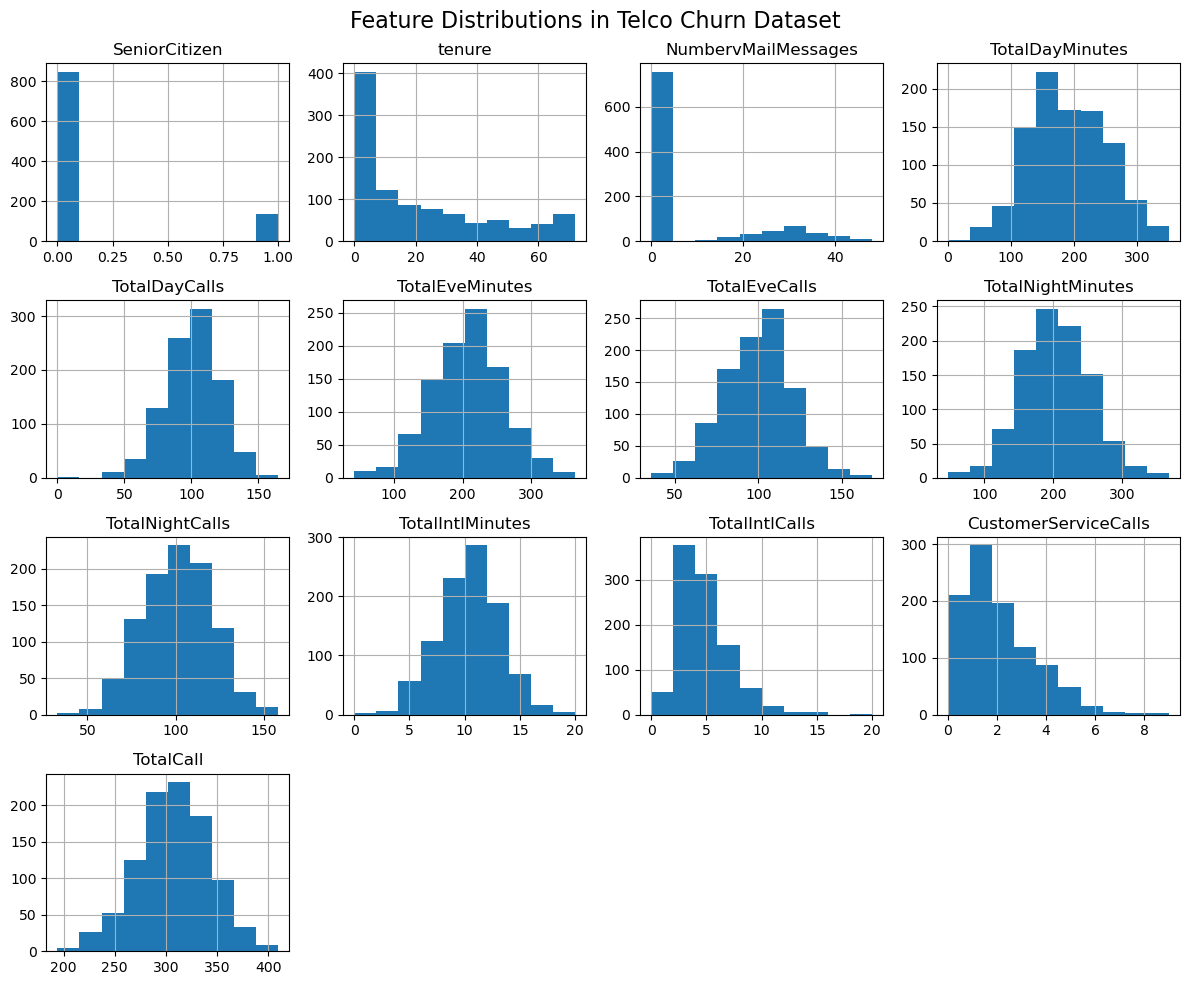

In [9]:
import matplotlib.pyplot as plt

df.hist(figsize=(12,10))

plt.suptitle("Feature Distributions in Telco Churn Dataset", fontsize=16)
plt.xlabel("Feature Values")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Data Cleaning & Encoding

In [10]:
# Dropping TotalCall as it is Redundant
df = df.drop(columns=["TotalCall"])

In [11]:
# Encoding Yes and No to 1 and 0
df.MaritalStatus.unique()

array(['No', 'Yes'], dtype=object)

In [12]:
cols = ["MaritalStatus", "OnlineSecurity", "OnlineBackup", "Dependents", "DeviceProtection", "TechSupport", "StreamingTV", "MultipleLines", "StreamingMovies", "PaperlessBilling", "InternationalPlan", "VoiceMailPlan", "Churn", "PhoneService"]

for col in cols:
    df[col] = df[col].replace({"Yes": 1, "No": 0, "No internet service": 2})

C:\Users\Ishaan\AppData\Local\Temp\ipykernel_10936\4206802215.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({"Yes": 1, "No": 0, "No internet service": 2})


In [13]:
df

,customerID,gender,SeniorCitizen,MaritalStatus,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalDayCalls,TotalEveMinutes,TotalEveCalls,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,TotalIntlCalls,CustomerServiceCalls,TotalRevenue,Churn
1,0004-TLHLJ,Male,0,0,0,4,1,0,Fiber optic,0,...,112,131.7,94,169.5,106,10.3,9,5,280.85,1
2,0013-MHZWF,Female,0,0,1,9,1,0,DSL,0,...,134,178.6,102,126.8,82,8.0,4,2,571.45,0
5,0018-NYROU,Female,0,1,0,5,1,0,Fiber optic,0,...,95,186.6,128,258.2,105,12.9,5,3,351.5,0
7,0022-TCJCI,Male,1,0,0,45,1,0,DSL,1,...,133,170.5,86,227.6,80,11.5,3,0,2791.5,1
9,0031-PVLZI,Female,0,1,1,4,1,0,No,2,...,99,167.9,93,193.6,106,8.0,4,1,76.35,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3311,9944-HKVVB,Female,0,0,0,3,1,0,Fiber optic,0,...,94,93.7,121,241.3,115,13.4,1,3,307.4,1
3313,9947-OTFQU,Male,1,0,0,15,1,0,Fiber optic,0,...,109,129.4,100,217.6,74,10.5,2,0,1074.3,1
3314,9948-YPTDG,Male,0,1,0,38,1,0,Fiber optic,1,...,138,228.4,117,117.3,103,12.8,4,2,3013.05,1
3317,9961-JBNMK,Male,1,0,0,21,1,0,Fiber optic,0,...,125,169.1,126,221.2,104,10.4,8,8,2030.3,1


In [14]:
df["gender"] = df["gender"].replace({"Male": 0, "Female": 1})
df

C:\Users\Ishaan\AppData\Local\Temp\ipykernel_10936\2636709035.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["gender"] = df["gender"].replace({"Male": 0, "Female": 1})


,customerID,gender,SeniorCitizen,MaritalStatus,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalDayCalls,TotalEveMinutes,TotalEveCalls,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,TotalIntlCalls,CustomerServiceCalls,TotalRevenue,Churn
1,0004-TLHLJ,0,0,0,0,4,1,0,Fiber optic,0,...,112,131.7,94,169.5,106,10.3,9,5,280.85,1
2,0013-MHZWF,1,0,0,1,9,1,0,DSL,0,...,134,178.6,102,126.8,82,8.0,4,2,571.45,0
5,0018-NYROU,1,0,1,0,5,1,0,Fiber optic,0,...,95,186.6,128,258.2,105,12.9,5,3,351.5,0
7,0022-TCJCI,0,1,0,0,45,1,0,DSL,1,...,133,170.5,86,227.6,80,11.5,3,0,2791.5,1
9,0031-PVLZI,1,0,1,1,4,1,0,No,2,...,99,167.9,93,193.6,106,8.0,4,1,76.35,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3311,9944-HKVVB,1,0,0,0,3,1,0,Fiber optic,0,...,94,93.7,121,241.3,115,13.4,1,3,307.4,1
3313,9947-OTFQU,0,1,0,0,15,1,0,Fiber optic,0,...,109,129.4,100,217.6,74,10.5,2,0,1074.3,1
3314,9948-YPTDG,0,0,1,0,38,1,0,Fiber optic,1,...,138,228.4,117,117.3,103,12.8,4,2,3013.05,1
3317,9961-JBNMK,0,1,0,0,21,1,0,Fiber optic,0,...,125,169.1,126,221.2,104,10.4,8,8,2030.3,1


In [15]:
df["InternetService"].unique()

array(['Fiber optic', 'DSL', 'No'], dtype=object)

In [16]:
df = pd.get_dummies(df, columns=["InternetService"], drop_first=True)
df = pd.get_dummies(df, columns=["Contract"], drop_first=True)
df = pd.get_dummies(df, columns=["PaymentMethod"], drop_first=True)
df

,customerID,gender,SeniorCitizen,MaritalStatus,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,CustomerServiceCalls,TotalRevenue,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1,0004-TLHLJ,0,0,0,0,4,1,0,0,0,...,5,280.85,1,True,False,False,False,False,True,False
2,0013-MHZWF,1,0,0,1,9,1,0,0,0,...,2,571.45,0,False,False,False,False,True,False,False
5,0018-NYROU,1,0,1,0,5,1,0,0,0,...,3,351.5,0,True,False,False,False,False,True,False
7,0022-TCJCI,0,1,0,0,45,1,0,1,0,...,0,2791.5,1,False,False,True,False,True,False,False
9,0031-PVLZI,1,0,1,1,4,1,0,2,2,...,1,76.35,1,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3311,9944-HKVVB,1,0,0,0,3,1,0,0,1,...,3,307.4,1,True,False,False,False,False,True,False
3313,9947-OTFQU,0,1,0,0,15,1,0,0,1,...,0,1074.3,1,True,False,False,False,False,True,False
3314,9948-YPTDG,0,0,1,0,38,1,0,1,1,...,2,3013.05,1,True,False,False,False,False,True,False
3317,9961-JBNMK,0,1,0,0,21,1,0,0,0,...,8,2030.3,1,True,False,False,False,False,False,False


<Axes: >

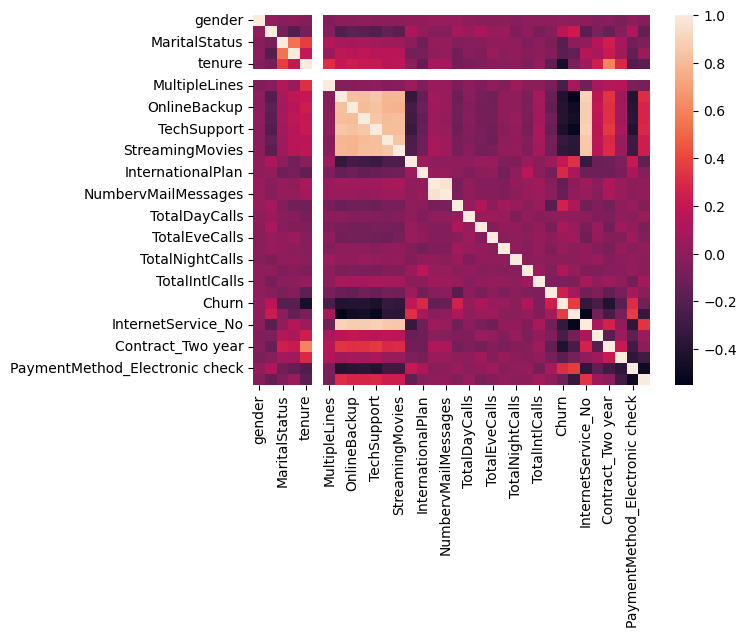

In [17]:
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True))

In [18]:
df = df.drop("customerID", axis=1)

df[df.eq(" ").any(axis=1)]

df = df[~df.eq(" ").any(axis=1)]
df["TotalRevenue"] = pd.to_numeric(df["TotalRevenue"], errors="coerce")
df = df.dropna(subset=["TotalRevenue"])
print(df["TotalRevenue"].dtype)

float64


In [19]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training

In [21]:
model = LogisticRegression(max_iter=2000, class_weight="balanced")
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=2000)

In [23]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8520408163265306

Confusion Matrix:
 [[82 17]
 [12 85]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85        99
           1       0.83      0.88      0.85        97

    accuracy                           0.85       196
   macro avg       0.85      0.85      0.85       196
weighted avg       0.85      0.85      0.85       196



In [25]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [26]:
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

In [27]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.8673469387755102

Confusion Matrix:
 [[84 15]
 [11 86]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87        99
           1       0.85      0.89      0.87        97

    accuracy                           0.87       196
   macro avg       0.87      0.87      0.87       196
weighted avg       0.87      0.87      0.87       196



In [29]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

xgb.fit(X_train, y_train)

C:\Users\Ishaan\anaconda3\Lib\site-packages\xgboost\training.py:200: UserWarning: [19:32:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [30]:
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

In [31]:
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

Accuracy: 0.9030612244897959

Confusion Matrix:
 [[91  8]
 [11 86]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91        99
           1       0.91      0.89      0.90        97

    accuracy                           0.90       196
   macro avg       0.90      0.90      0.90       196
weighted avg       0.90      0.90      0.90       196



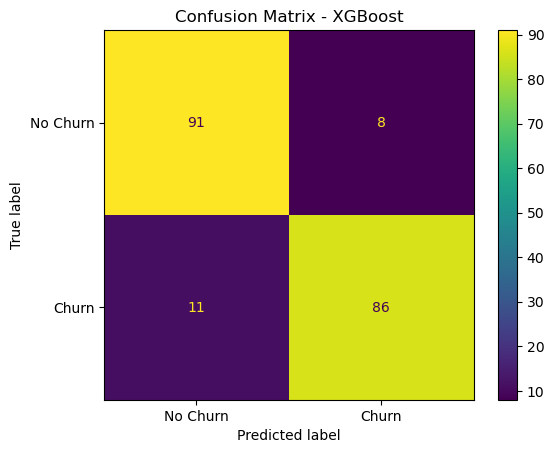

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_xgb,
    display_labels=["No Churn", "Churn"]
)

plt.title("Confusion Matrix - XGBoost")
plt.show()

In [ ]:
import joblib

joblib.dump(xgb, "xgboost_model.pkl")